# Flujo de dos fases a través de una tubería 


## Modelo
Este modelo determina el flujo de masa de descarga  a través de un tubo a presión atmosférica.



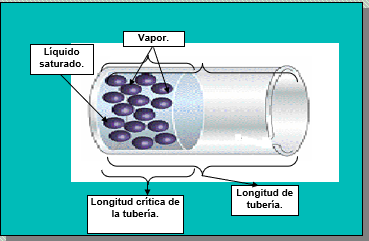

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|Li|		Longitud de tubería|cm|		
|Te		|Temperatura ambiente		|K|
|Ps|		Presión de saturación|		Pa|
|Pa	|	Presión de almacenamiento|		Pa|
|Pc	|	Presión de la corriente	|	Pa|
|Lc		|Longitud crítica de la tubería		|cm|
|Cd|		Coeficiente de descarga		|0.85|
|$\rho$		|Densidad del fluido		|kg/m^3|
|Cp	|	Capacidad calorífica|		J/Kg*K|
|hfg|		Calor de vaporización		|J/Kg|
|vfg		|Volumen específico de la vaporización.		|m^3/kg|
|gc|Constante gravitacional|kg.m/N.s^2|


### Incógnitas
|Variable|Significado|Unidades|
|------|------|------|
|N|		Parámetro de no equilibrio||		
|Gsub		|Flux másico subenfriado	|	kg/m^2*s|
|Germ|		Flux másico de equilibrio	|	kg/m^2*s|
|ma		|Flux másico		|kg/m^2*s|


### Consideraciones
- No hay presión propia de la corriente.



## Desarrollo y ecuaciones

El flux másico a dos fases se puede calcular con la ecuación:
- Ecuación 1.  $m=A\sqrt{G^2_{SUB}+\frac{G^2_{ERM}}{N}}$


 Donde el término de Gsub se refiere al flux másico pero subenfriado 
 - Ecuación 2. $G_{SUB}=C_D\sqrt{2\rho gc(P-P_{sat})}$
 
 
 

De manera similar el término de Germ refiere la fracción de flux másico pero en equilibrio
- Ecuación 3. 

$G_{ERM}=\frac{h_fg}{v_fg}\sqrt{\frac{gc}{T C_p}}$

En líquidos saturados, el equilibrio se alcanza cuando la descarga es a través de tuberías mayores a 0.1m de longitud.Para descargas en tuberías menores a 0.1m, la vaporización incrementa fuertemente con la disminución de la longitud. 

Este efecto de no equilibrio es estimado por el parámetro N, que se calcula:
- Ecuación 4. $N=\frac{h^2_fg}{2\Delta P \rho C^2_D v^2_fg T C_p}+\frac{L}{L_C}$
- $0 	\leq L	\leq L_C$
- $\Delta P=P-P_0$

Cuando se comienza a descargar el líquido a dos fases a una longitud muy pequeña se comporta como líquido puro. Por ello se utiliza la ecuación para descarga por un orificio:
- Ecuación 5a. $m=AC_D\sqrt{2\rho g_c(P-P_0)}$

Los flujos másicos de descarga tanto para descarga por un orificio como para el de dos fases, dependen del área de descarga, por ello y debido al problema, se puede introducir dicho término en el concepto de flujo másico y hablar en conjunto como flux másico de descarga.

- Ecuación 5b.   $m_A=\frac{m}{A}$

## Resultados


In [2]:
#Datos
Te=298
Ps=9500000
Pa=9500000
Pc=0
Lc=10
Cd=0.85
rho=490
Cp=2230
hfg=333000
vfg=0.048
gc=1


Cálculo de caída de presión total

In [3]:
dP= Pa-Pc
print("DP= "+str(dP))

DP= 9500000


Resultados para distintas longitudes de tubería:

In [19]:
import numpy as np
import math
L_tuberia=np.array([0,5,10,15])
N=(hfg**2)/(2*dP*rho*Cd**2*vfg**2*Te*Cp)+L_tuberia/Lc
Gsub=Cd*np.sqrt(2*rho*gc*(Pa-Ps))
Germ=(hfg/vfg)*np.sqrt(gc/(Te*Cp))
ma=np.sqrt((Gsub**2+Germ**2)/N)

print("Gsub=" +str(Gsub))

print("Germ=" +str(round(Germ,3)))


print('{:^10}''{:^10}''{:^10}'.format('L tub[cm]','N','ma'))

for i in range(len(L_tuberia)):
    
    print('{:^10.0f}''{:^10.4f}''{:^10.2f}'.format(L_tuberia[i],N[i],ma[i]))

Gsub=0.0
Germ=8510.252
L tub[cm]     N         ma    
    0       0.0108   82015.09 
    5       0.5108   11907.79 
    10      1.0108   8464.80  
    15      1.5108   6923.79  


### Resultados

El flux másico de líquido por el orificio (L=0) y el flux másico total a dos fases (L=15) son:

In [20]:
print("ma líquido por orificio= "+ str(round(ma[0],2))+ " Kg/m^2 s")

print("ma a dos fases por tubería= "+ str(round(ma[3],2))+ " Kg/m^2 s")

ma líquido por orificio= 82015.09 Kg/m^2 s
ma a dos fases por tubería= 6923.79 Kg/m^2 s
